In [1]:
import json
import time 
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Get Match Id's from (hopefully all) parsed matches
with open("example_matches.json", encoding="utf8") as example_json:
    jsonObject = json.load(example_json)
    example_json.close()

    

In [4]:
# Sammeln der Match Id's
test_match_ids = []


for i in range(len(jsonObject)):
    test_match_ids.append(jsonObject[i]['match_id'])


[5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294954561,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5294987675,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295022175,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295103933,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295112587,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295122289,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295148562,
 5295182575,
 5295182575,
 5295182575,
 5295182575,
 5295182575,
 5295182575,
 5295182575,

In [5]:
# finden einzigartiger Match Id's
unique_match_ids = []

for i in range(len(test_match_ids)):
    if test_match_ids[i] not in unique_match_ids:
        unique_match_ids.append(test_match_ids[i])
  

[5294954561,
 5294987675,
 5295022175,
 5295103933,
 5295112587,
 5295122289,
 5295148562,
 5295182575,
 5295191373,
 5295207783,
 5295221474,
 5295242366,
 5295249134,
 5295269531,
 5295292772,
 5295310079,
 5295331990,
 5295361746,
 5295396390,
 5295409682,
 5295426871,
 5295453859,
 5295468616,
 5295497112,
 5295530607,
 5295549665,
 5295584729,
 5295684399,
 5295756701,
 5295844012,
 5295862405,
 5295923434,
 5295928917,
 5295978398,
 5296035987,
 5296055486,
 5296113815,
 5296318758,
 5296483258,
 5296584151,
 5296761270,
 5296824868,
 5296862488,
 5296883180,
 5296896614,
 5296911710,
 5296935341,
 5296939984,
 5296968247,
 5296995804,
 5297014442,
 5297031210,
 5297062182,
 5297086814,
 5297089147,
 5297138654,
 5297160208,
 5297176481,
 5297201076,
 5297216386,
 5297227142,
 5297245308,
 5297260511,
 5297260998,
 5297276695,
 5297302456,
 5297338937,
 5297345877,
 5297363856,
 5297373227,
 5297403974,
 5297404365,
 5297462266,
 5297462705,
 5297536150,
 5297597795,
 5297613668,

In [11]:
# Holen der Matches von OpenDota

match_data = []

for i in range(len(unique_match_ids)):
    time.sleep(1.2)
    b = requests.get("https://api.opendota.com/api/matches/"+str(unique_match_ids[i]))
    match_data.append(b.json())

with open('match_data.json', 'w') as fout:
    json.dump(match_data ,fout)
    
print("Success")
    

Success


In [3]:
#Laden gespeicherter geparster Matches
with open('match_data.json') as json_file:
    matches_json = json.load(json_file)

In [4]:
print(matches_json[0])

{'match_id': 5294954561, 'barracks_status_dire': 63, 'barracks_status_radiant': 60, 'chat': [{'time': -673, 'type': 'chat', 'unit': 'Lil_NIck', 'key': 'psychologically brutal', 'slot': 5, 'player_slot': 128}, {'time': -143, 'type': 'chatwheel', 'key': '6', 'slot': 5, 'player_slot': 128}, {'time': -143, 'type': 'chatwheel', 'key': '6', 'slot': 5, 'player_slot': 128}, {'time': -58, 'type': 'chatwheel', 'key': '86003', 'slot': 3, 'player_slot': 3}, {'time': -54, 'type': 'chatwheel', 'key': '87', 'slot': 3, 'player_slot': 3}, {'time': -43, 'type': 'chatwheel', 'key': '62', 'slot': 5, 'player_slot': 128}, {'time': -43, 'type': 'chatwheel', 'key': '62', 'slot': 5, 'player_slot': 128}, {'time': 6, 'type': 'chatwheel', 'key': '12001', 'slot': 5, 'player_slot': 128}, {'time': 8, 'type': 'chatwheel', 'key': '70', 'slot': 5, 'player_slot': 128}, {'time': 77, 'type': 'chat', 'unit': 'bgod', 'key': 'g sorry mouse', 'slot': 6, 'player_slot': 129}, {'time': 77, 'type': 'chat', 'unit': 'Lil_NIck', 'ke

In [5]:
win_pings = []
data_pings = []
game_duration = []


for j in range(len(matches_json)):
    total_pings_win = 0
    total_pings_loss = 0
    ping_list_win = []
    ping_list_loss = []
    radiant_win = matches_json[j]['radiant_win']
    team_kills_win_ = []
    team_kills_loss_ = []
    team_deaths_win_ = []
    team_deaths_loss_= []
    team_assists_win_ = []
    team_assists_loss_ = []
    
    try:    
        for i in range(len(matches_json[j]['players'])):
            test_ping = matches_json[j]['players'][i]['pings']
            
            if matches_json[j]['players'][i]['win'] == True:
                pings = matches_json[j]['players'][i]['pings']
                if pings == None:
                    pings = 0
                total_pings_win += pings
                ping_list_win.append(pings)
                team_kills_win_.append(matches_json[j]['players'][i]['kills'])
                team_deaths_win_.append(matches_json[j]['players'][i]['deaths'])
                team_assists_win_.append(matches_json[j]['players'][i]['assists'])
            else:
                pings = matches_json[j]['players'][i]['pings']
                if pings == None:
                    pings = 0
                total_pings_loss += pings
                ping_list_loss.append(pings)
                team_kills_loss_.append(matches_json[j]['players'][i]['kills'])
                team_deaths_loss_.append(matches_json[j]['players'][i]['deaths'])
                team_assists_loss_.append(matches_json[j]['players'][i]['assists'])
        
        
        team_kills_win = (sum(team_kills_win_))
        team_kills_loss = (sum(team_kills_loss_))
        team_deaths_win = (sum(team_deaths_win_))
        team_deaths_loss = (sum(team_deaths_loss_))
        team_assists_win = (sum(team_assists_win_))
        team_assists_loss = (sum(team_assists_loss_))
        win_pings.append([total_pings_win, 1])
        win_pings.append([total_pings_loss, 0])
        winner_ping_higher = total_pings_win > total_pings_loss
        winner_highest_ping_player = max(ping_list_win) >= max(ping_list_loss)
    
        data_pings.append([radiant_win, winner_ping_higher, winner_highest_ping_player, total_pings_win, total_pings_loss, team_kills_win, team_kills_loss, team_deaths_win, team_deaths_loss, team_assists_win, team_assists_loss])
        game_duration.append(matches_json[j]['duration'])
    except KeyError:
            pass
            
dataframe = pd.DataFrame(win_pings, columns =['ttlPings', 'win',])
df = pd.DataFrame(data_pings, columns =['radiant_Win', 'winner_ping_higher', 'winner_highest_ping_player', 'total_pings_win', 'total_pings_loss', 'team_kills_win', 'team_kills_loss', 'team_deaths_win', 'team_deaths_loss', 'team_assists_win', 'team_assists_loss'])
print("Anzahl brauchbarer Matches: ", len(df.index))


# Features zu testen: Highest Ping Player radiant, 

Anzahl brauchbarer Matches:  657


[]

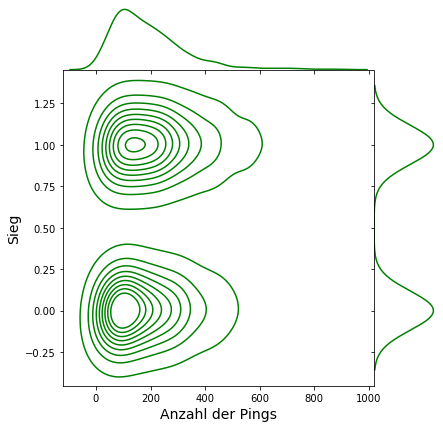

In [6]:
# Darstellen der Relation von Pinganzahl eines Teams zu Sieg oder Niederlage

g = sns.jointplot(x = "ttlPings", y = "win", data=dataframe,
                  kind="kde", space=0, color="g")
g.set_axis_labels(xlabel='Anzahl der Pings', ylabel='Sieg', fontsize = 14)

plt.plot()

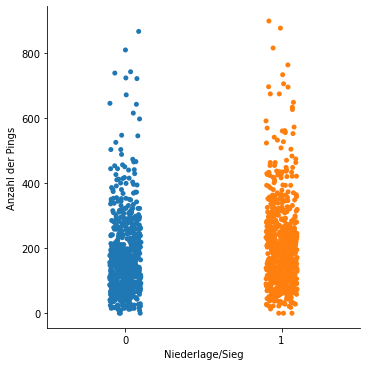

In [7]:
f = sns.catplot(y = "ttlPings", x = "win", data = dataframe[["ttlPings", "win"]])
f.set(xlabel='Niederlage/Sieg', ylabel='Anzahl der Pings')

plt.show()


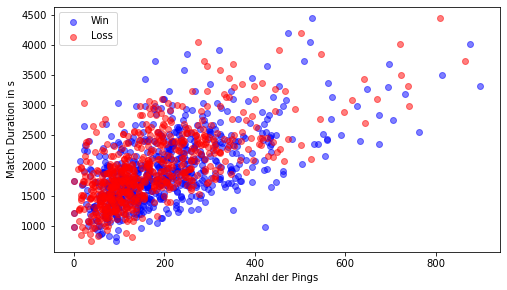

In [12]:
plt.rcParams["figure.figsize"] = (8,4.5)

plt.scatter(df['total_pings_win'], game_duration, color = 'blue', alpha = 0.5, label = 'Win')
plt.scatter(df['total_pings_loss'], game_duration, color = 'red', alpha = 0.5, label = 'Loss')
plt.xlabel('Anzahl der Pings')
plt.ylabel('Match Duration in s')
plt.legend()
plt.show()

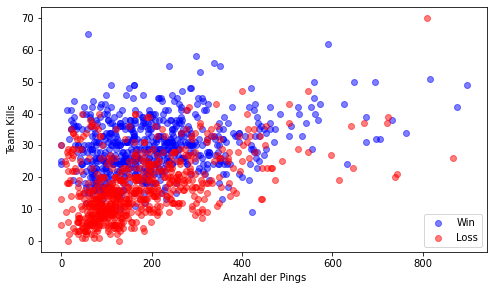

In [9]:
plt.rcParams["figure.figsize"] = (8,4.5)

plt.scatter(df['total_pings_win'], df['team_kills_win'], color = 'blue', alpha = 0.5, label = 'Win')
#plt.plot(df['total_pings_loss'], color = 'red')
plt.scatter(df['total_pings_loss'], df['team_kills_loss'], color = 'red', alpha = 0.5, label = 'Loss')
plt.xlabel('Anzahl der Pings')
plt.ylabel('Team Kills')
plt.legend()
plt.show()

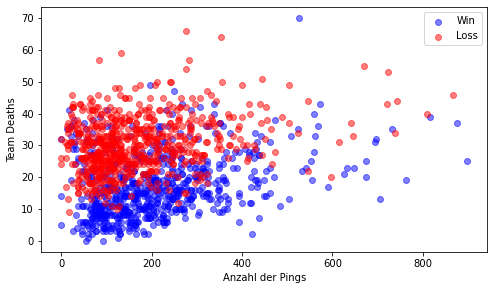

In [10]:
plt.rcParams["figure.figsize"] = (8,4.5)

plt.scatter(df['total_pings_win'], df['team_deaths_win'], color = 'blue', alpha = 0.5, label = 'Win')
#plt.plot(df['total_pings_loss'], color = 'red')
plt.scatter(df['total_pings_loss'], df['team_deaths_loss'], color = 'red', alpha = 0.5, label = 'Loss')
plt.xlabel('Anzahl der Pings')
plt.ylabel('Team Deaths')
plt.legend()
plt.show()

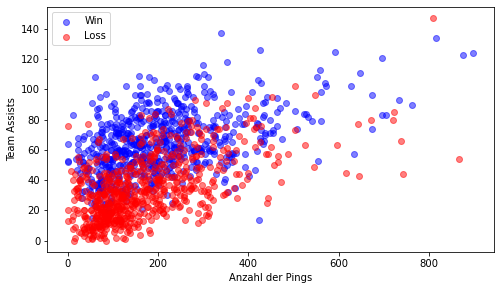

In [11]:
plt.rcParams["figure.figsize"] = (8,4.5)

plt.scatter(df['total_pings_win'], df['team_assists_win'], color = 'blue', alpha = 0.5, label = 'Win')
#plt.plot(df['total_pings_loss'], color = 'red')
plt.scatter(df['total_pings_loss'], df['team_assists_loss'], color = 'red', alpha = 0.5, label = 'Loss')
plt.xlabel('Anzahl der Pings')
plt.ylabel('Team Assists')
plt.legend()
plt.show()